Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import zipfile
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
#Unzipping zip file
unzip=0 # Keep unzip = 1 if you need to unzip
zip_file_location="/content/gdrive/My Drive/CNN_assignment.zip"
unzipped_folder="/content/gdrive/My Drive/CNN_assignment"
if unzip==1:
  zip_ref = zipfile.ZipFile(zip_file_location, 'r')
  zip_ref.extractall(unzipped_folder)
  zip_ref.close()
else:
  print("Folder already unzipped")
  

Folder already unzipped


In [7]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(os.path.join(unzipped_folder,"Skin cancer ISIC The International Skin Imaging Collaboration","Train"))
data_dir_test = pathlib.Path(os.path.join(unzipped_folder,"Skin cancer ISIC The International Skin Imaging Collaboration","Test"))

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Total Train images :",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Total Test images :",image_count_test)

Total Train images : 2239
Total Test images : 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [9]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [10]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
  labels = "inferred",
  label_mode = "categorical",
  color_mode = "rgb",
  batch_size = batch_size,
  image_size = (img_height,img_width),
  seed = 123,
  subset = "training",
  validation_split = 0.2
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
  labels = "inferred",
  label_mode = "categorical",
  color_mode = "rgb",
  batch_size = batch_size,
  image_size = (img_height,img_width),
  seed = 123,
  subset = "validation",
  validation_split = 0.2
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [13]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

In [14]:
#Batch Size
for image_batch, labels_batch in train_ds:
 print(image_batch.shape)
 break

(32, 180, 180, 3)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout,BatchNormalization
from keras.regularizers import l2


In [17]:
#Keeping the seed=123 for same reproducible results
import random
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [18]:
#create model
model = Sequential(name="Sequential_CNN")
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [19]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 90, 90, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 90, 90, 32)    

### Train the model

In [21]:
epochs = 20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 29s 88ms/step - loss: 4.0621 - accuracy: 0.3510 - val_loss: 23.3980 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5017 - accuracy: 0.4866 - val_loss: 34.9848 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3489 - accuracy: 0.5195 - val_loss: 36.4193 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.2800 - accuracy: 0.5592 - val_loss: 33.7663 - val_accuracy: 0.1566
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 1.1109 - accuracy: 0.5960 - val_loss: 25.3060 - val_accuracy: 0.1230
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.0328 - accuracy: 0.6161 - val_loss: 16.8135 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 0.9087 - accuracy: 0.6602 - val_loss: 8.4123 - val_accuracy: 0.2192
Epoch 

### Visualizing training results

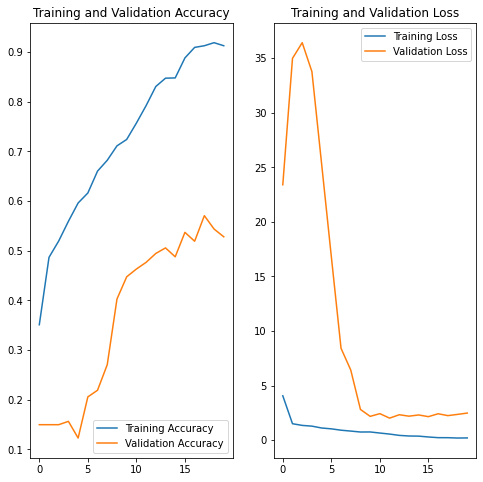

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [23]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
train_acc_last=history.history['accuracy'][-1]
val_acc_last = history.history['val_accuracy'][-1]
print(f"The training accuracy for {epochs} epochs is {round(train_acc_last*100,2)} and the validatation accuracy is {round(val_acc_last*100,2)}\n")
print("There is significant overfitting observed in the model, this may be due to class imbalance or complexity of the model")
print("\n We can use some dropout or regularization techniques, or use data augmentation to reduce overfit")

The training accuracy for 20 epochs is 91.24 and the validatation accuracy is 52.8

There is significant overfitting observed in the model, this may be due to class imbalance or complexity of the model

 We can use some dropout or regularization techniques, or use data augmentation to reduce overfit


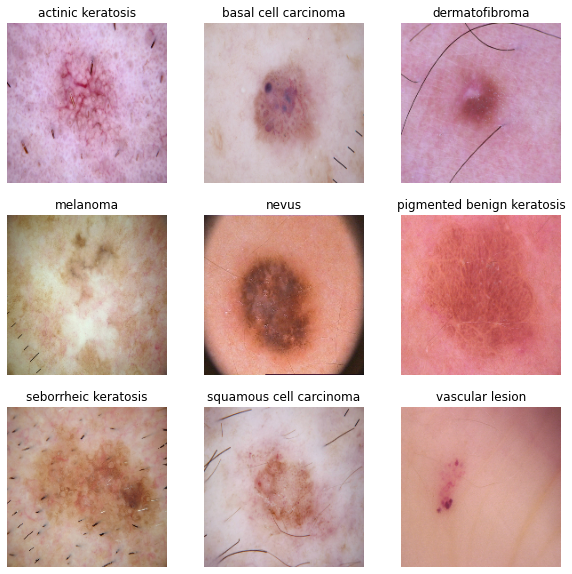

In [24]:
# Todo, visualize one instance of training image for each class.
#Visualizing first image - Before Augmentation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
img_list=[]
lab_list=[]
lab=0
j=1
while len(lab_list)!=9:
  for images, labels in train_ds.take(j):
    for i in range(batch_size-1):
        posn = list(labels[i]).index(1)
        if posn==lab:
          img_list.append(images[i].numpy().astype("uint8"))
          lab_list.append(class_names[posn])
          lab+=1
  j+=1
for k in range(len(lab_list)):
  image=img_list[k]
  label=lab_list[k]
  ax = plt.subplot(3, 3, k + 1)
  plt.imshow(image)
  plt.title(label)
  plt.axis("off")

Image of melanoma before augmentation


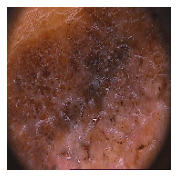

Images of melanoma after augmentation


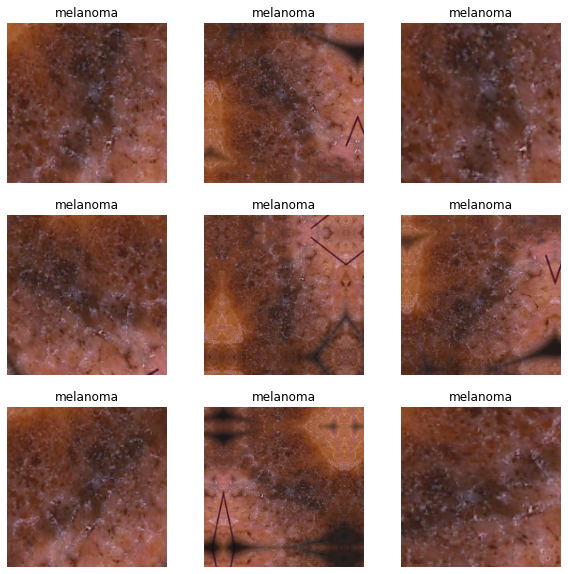

In [25]:
#Visualizing melanoma image -how your augmentation strategy works : After Augmentation - Random Rotation, Flip & Zoom
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),layers.RandomRotation(0.5),layers.RandomZoom(0.5)])
plt.figure(figsize=(3, 3))
for images, labels in train_ds.take(1):
  for k in range(batch_size-1):
    label_name=class_names[list(labels[k]).index(1)]
    if label_name=="melanoma":
      print(f"Image of {label_name} before augmentation")
      plt.imshow(images[k].numpy().astype("uint8"))
      plt.axis("off")
      plt.show()
      plt.figure(figsize=(10, 10))
      print(f"Images of {label_name} after augmentation")
      for i in range(9):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[k].numpy().astype("uint8"))
        plt.title(class_names[list(labels[k]).index(1)])
        plt.axis("off")
      break

### Todo: 
### Create the model, compile and train the model


In [ ]:
#Model 2 : Data Augmentation with DropOut Layers and L2 Regularization to Tackle Overfitting

In [26]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
#create model
model2 = Sequential(name="Sequential_CNN_with_Augmentation_Dropout_L2Reg")
model2.add(data_augmentation)
model2.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model2.add(Conv2D(16, kernel_size=(3, 3), padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model2.add(Conv2D(32, kernel_size=(3, 3), padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model2.add(Conv2D(64, kernel_size=(3, 3), padding="same",activation="relu"))
model2.add(Dropout(0.25))
model2.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(len(class_names), activation='softmax'))

### Compiling the model

In [27]:
## Your code goes here
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model2.summary()

Model: "Sequential_CNN_with_Augmentation_Dropout_L2Reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                

### Training the model

In [29]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history2 = model2.fit(train_ds,validation_data=val_ds,epochs=epochs,use_multiprocessing=True)

Epoch 1/20
56/56 [==============================] - 3s 33ms/step - loss: 1.9496 - accuracy: 0.2617 - val_loss: 1.8138 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.7162 - accuracy: 0.3789 - val_loss: 1.5823 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5433 - accuracy: 0.4643 - val_loss: 1.4498 - val_accuracy: 0.5101
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4882 - accuracy: 0.4621 - val_loss: 1.4959 - val_accuracy: 0.4922
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4078 - accuracy: 0.4944 - val_loss: 1.4033 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3810 - accuracy: 0.5095 - val_loss: 1.4625 - val_accuracy: 0.4765
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3884 - accuracy: 0.5084 - val_loss: 1.4128 - val_accuracy: 0.5414
Epoch 8/20
56

### Visualizing the results

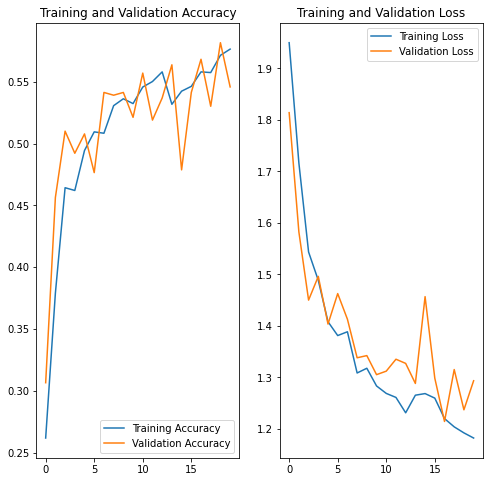

In [30]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [31]:
train_acc_last2 =history2.history['accuracy'][-1]
val_acc_last2 = history2.history['val_accuracy'][-1]
print(f"The training accuracy for {epochs} epochs is {round((train_acc_last2*100),2)} and the validatation accuracy is {round((val_acc_last2*100),2)}\n")
print("The training accuracy has significantly reduced, however the difference between training and validation accuracy is low now due to data augmentation, dropout layers and l2 regularization")
print("\n However the accuracy is low now suggesting that we have to take measures to increase accuracy such as tackling class imbalance")

The training accuracy for 20 epochs is 57.65 and the validatation accuracy is 54.59

The training accuracy has significantly reduced, however the difference between training and validation accuracy is low now due to data augmentation, dropout layers and l2 regularization

 However the accuracy is low now suggesting that we have to take measures to increase accuracy such as tackling class imbalance


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

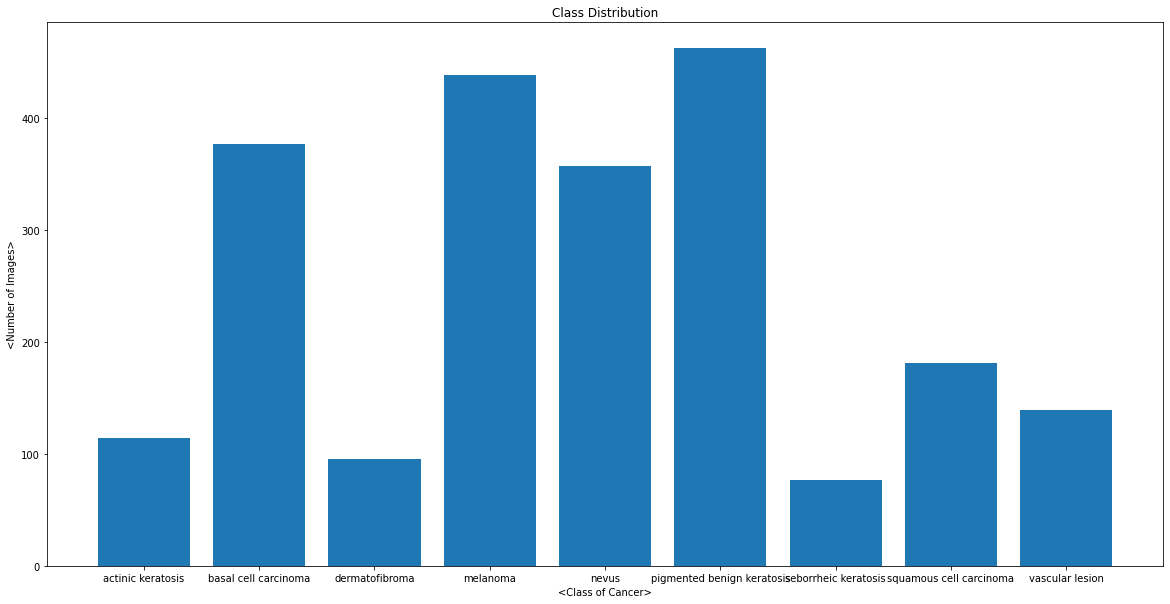

In [32]:
## Your code goes here.
class_names_dir=os.listdir(data_dir_train)
number_images_dir=[]
for class_name in class_names_dir:
  class_path=os.path.join(data_dir_train,class_name)
  number_images_dir.append(len(os.listdir(class_path)))

plt.figure(figsize=(20, 10))
plt.bar(class_names_dir,number_images_dir)
plt.title("Class Distribution")
plt.xlabel("<Class of Cancer>")
plt.ylabel("<Number of Images>")
plt.show()

In [33]:
print("Class : Number of Samples (% of Total)")
total_images=sum(number_images_dir)
for i in range(len(class_names_dir)):
  perc_images=round((number_images_dir[i]/total_images)*100,1)
  print(f"{class_names_dir[i]} : {number_images_dir[i]} ({perc_images} %)")

Class : Number of Samples (% of Total)
actinic keratosis : 114 (5.1 %)
basal cell carcinoma : 376 (16.8 %)
dermatofibroma : 95 (4.2 %)
melanoma : 438 (19.6 %)
nevus : 357 (15.9 %)
pigmented benign keratosis : 462 (20.6 %)
seborrheic keratosis : 77 (3.4 %)
squamous cell carcinoma : 181 (8.1 %)
vascular lesion : 139 (6.2 %)


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [34]:
print("The sevorrheic keratosis class has the least number of samples which is 77")
print("Pigmented benign keratosis & melanoma classes dominate the data with around 21% & 20% of the total {total_images} images respectively")

The sevorrheic keratosis class has the least number of samples which is 77
Pigmented benign keratosis & melanoma classes dominate the data with around 21% & 20% of the total {total_images} images respectively


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [35]:
aug=1
if aug==1:
  !pip install Augmentor
else:
  print("Augmentor Library already installed")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [36]:
#Copy CNN_Assignment to another folder
import shutil
original = pathlib.Path(os.path.join(unzipped_folder,"Skin cancer ISIC The International Skin Imaging Collaboration"))
augmented= pathlib.Path(os.path.join(unzipped_folder,"Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation"))
#Use if folder copied
if not os.path.exists(augmented):
  shutil.copytree(original,augmented)
else:
  print("Folder Already Copied")
#Test and Train New Folders
data_dir_new_train=os.path.join(augmented,"Train")
data_dir_new_test=os.path.join(augmented,"Test")

In [37]:
path_to_training_dataset=data_dir_new_train
import Augmentor
for i in class_names:
  if not os.path.exists(os.path.join(path_to_training_dataset,i,"output")):
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset,i))
    p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.15, min_factor=1.1, max_factor=1.6)
    p.flip_left_right(probability=0.1)
    p.flip_top_bottom(probability=0.1)
    p.shear(max_shear_left=5,max_shear_right=5,probability=0.15)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
  else:
    print(f"{i} class already Augmented")

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4AEDD4CC50>: 100%|██████████| 500/500 [00:20<00:00, 24.96 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4AEDD9AB50>: 100%|██████████| 500/500 [00:21<00:00, 23.75 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4AEDE05850>: 100%|██████████| 500/500 [00:19<00:00, 25.40 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4AEDE2B310>: 100%|██████████| 500/500 [01:40<00:00,  4.97 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4AEDC64D10>: 100%|██████████| 500/500 [01:24<00:00,  5.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4AEDDB1310>: 100%|██████████| 500/500 [00:19<00:00, 26.22 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4AEDD94590>: 100%|██████████| 500/500 [00:41<00:00, 11.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4AEDC9AF10>: 100%|██████████| 500/500 [00:20<00:00, 24.30 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration For Augmentation/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4C0AF95590>: 100%|██████████| 500/500 [00:18<00:00, 27.00 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [38]:
import glob
from pathlib import Path
image_count_train = len(list(Path(data_dir_new_train).glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [39]:
import glob
path_list= [x for x in glob.glob(os.path.join(data_dir_new_train, '*', '*.jpg'))]
path_list_new= [x for x in glob.glob(os.path.join(data_dir_new_train, '*','output', '*.jpg'))]
print("Before Augmentation,Total Images : ",len(path_list))
print("Total Augmented Images : ",len(path_list_new))

Before Augmentation,Total Images :  2239
Total Augmented Images :  4500


In [40]:
#Labels for the paths
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_new_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_new_train, '*','output', '*.jpg'))]

In [41]:
#Creating dataframe with path and labels
dataframe_dict= dict(zip(path_list, lesion_list))
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
original_df=pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [42]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [43]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

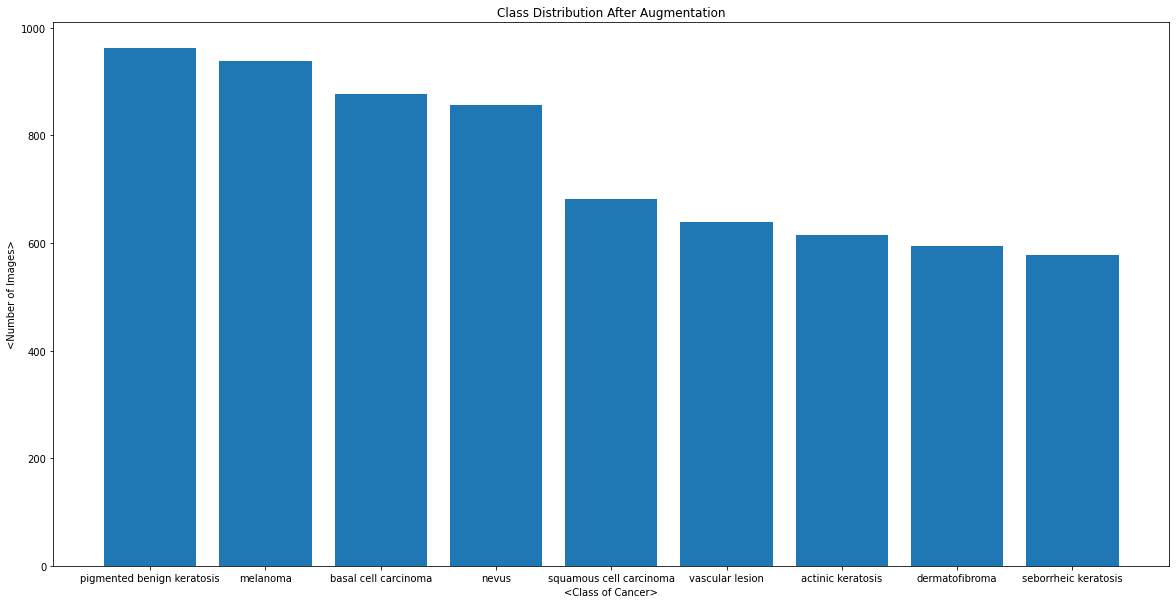

In [44]:
#Plot Distribution of Images after augmentation
class_names_total=list(new_df['Label'].value_counts().keys())
number_images_total=list(new_df['Label'].value_counts().values)
plt.figure(figsize=(20, 10))
plt.bar(class_names_total,number_images_total)
plt.title("Class Distribution After Augmentation")
plt.xlabel("<Class of Cancer>")
plt.ylabel("<Number of Images>")
plt.show()

In [45]:
print("Total Images after Augmentation: ",len(new_df))

Total Images after Augmentation:  6739


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [46]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [47]:
#We use the same directory as before, because the directory contains also augmented images
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_new_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [48]:
val_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_new_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [80]:
# ## your code goes here
model3 = Sequential(name="Sequential_CNN_with_Augmentation_Dropout_ClassImbalance-Resolved")
model3.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model3.add(Conv2D(16, kernel_size=(3, 3), padding="same",activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(3, 3),padding="same"))
model3.add(Conv2D(32, kernel_size=(3, 3), padding="same",activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(3, 3),padding="same"))
model3.add(Conv2D(64, kernel_size=(2, 2), padding="same",activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Conv2D(128, kernel_size=(2, 2), padding="same",activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(len(class_names), activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [81]:
## your code goes here
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
model3.summary()

Model: "Sequential_CNN_with_Augmentation_Dropout_ClassImbalance-Resolved"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_17 (Bat  (None, 180, 180, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 60, 60, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 b

#### **Todo:**  Train your model

In [84]:
epochs = 20
## Your code goes here.
history3 = model3.fit(train_ds_new,validation_data=val_ds_new,epochs=epochs)

Epoch 1/20
169/169 [==============================] - 31s 175ms/step - loss: 1.7976 - accuracy: 0.3438 - val_loss: 5.2058 - val_accuracy: 0.1084
Epoch 2/20
169/169 [==============================] - 31s 175ms/step - loss: 1.4634 - accuracy: 0.4527 - val_loss: 3.8654 - val_accuracy: 0.2383
Epoch 3/20
169/169 [==============================] - 31s 175ms/step - loss: 1.3168 - accuracy: 0.5043 - val_loss: 2.2151 - val_accuracy: 0.3526
Epoch 4/20
169/169 [==============================] - 31s 175ms/step - loss: 1.1944 - accuracy: 0.5451 - val_loss: 1.7718 - val_accuracy: 0.4143
Epoch 5/20
169/169 [==============================] - 30s 174ms/step - loss: 1.0958 - accuracy: 0.5825 - val_loss: 1.5981 - val_accuracy: 0.4298
Epoch 6/20
169/169 [==============================] - 31s 176ms/step - loss: 0.9779 - accuracy: 0.6280 - val_loss: 1.2907 - val_accuracy: 0.5330
Epoch 7/20
169/169 [==============================] - 32s 184ms/step - loss: 0.8848 - accuracy: 0.6634 - val_loss: 1.3674 - val_ac

#### **Todo:**  Visualize the model results

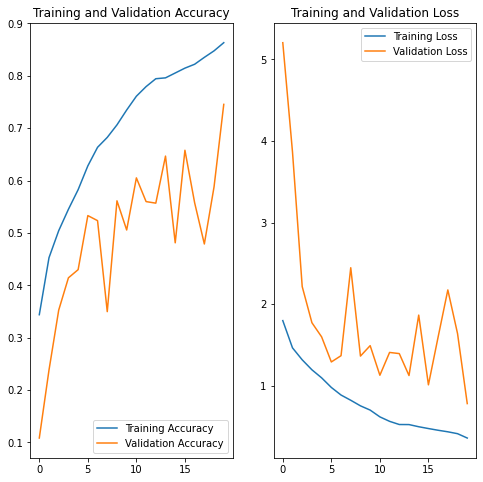

In [85]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [86]:
#Metrics
_,train_acc=model3.evaluate(train_ds_new)
_,val_acc=model3.evaluate(val_ds_new)
print("The train accuracy is ",round(train_acc*100,2))
print("The validation accuracy is ",round(val_acc*100,2))

43/43 [==============================] - 6s 117ms/step - loss: 0.7800 - accuracy: 0.7454
The train accuracy is  86.46
The validation accuracy is  74.54


### Conclusions :

- The final model which uses a different architecture and also dropout layer and batch normalization is used to prevent overfitting

- We can observe that with augmentation and the measures used like dropout & batch normalization have reduced the overfitting in the final model, but still slight overfitting is present and the validation accuracy has also improved

- We can also improve CNN layers by tweaking depth, stride, padding etc.

- However the model can be further improved, by using more augmentation, tweaking the architecture, changing learning rate, early stopping and additional layers can be used to improve training and validation accuracy

- Running the model for more epochs may lead to smoother training and the fluctuations in accuracy could smoothen out

### End of Text